# ABOUT:
- this notebook plots the performance over the hyperparameters:
    - number of hidden neurons
    - learning rate
    - batch size

# Findings:
- optimal hyperparameters:
    - 10/12 hidden neurons
    - 0.0015 learning rate (Adam)
    - batch size 50

In [1]:
# from SATSA_FinBERT import *
# import random
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
def filter_results(df, dataset_name = ["Fi_ATSA_train", "Fi_ATSA_test", "Fi_ATSA_eda"], mode = ['Train', "Validation"], epoch = None, HL1_size = None, batch_size = None, learning_rate = None):
    df = df[df['dataset_name'].isin(dataset_name)]
    df = df[df['mode'].isin(mode)]
    if epoch:
        df = df[df['epoch']==epoch]
    if HL1_size:
        df = df[df['HL1_size'].isin(HL1_size)]
    if batch_size:
        df = df[df['batch_size'].isin(batch_size)]
    if learning_rate:
        df = df[df['learning_rate'].isin(learning_rate)]
    return df

In [3]:
directory = r"C:\Users\tanch\Documents\NTU\URECA - Aspect Based Sentiment Analysis\URECA--Financial-Aspect-Based-Sentiment-Analysis\logs\csv_files"

In [4]:
data = pd.DataFrame()
for filename in os.listdir(directory):
    data = data.append(pd.read_csv(os.path.join(directory, filename)))
    

<AxesSubplot:xlabel='epoch', ylabel='epoch_f1'>

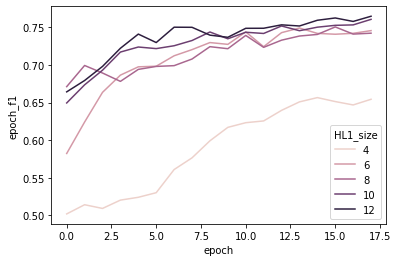

In [16]:
tmp = filter_results(data, mode = ["Test"], dataset_name = ["Fi_ATSA_eda"], batch_size = [50])
tmp["epoch"] = [i%18 for i in range(len(tmp["epoch"]))]
tmp = tmp.groupby(["epoch","HL1_size"]).mean()
sb.lineplot(data = tmp, x = "epoch", y = "epoch_f1", hue = "HL1_size")

<AxesSubplot:xlabel='epoch', ylabel='epoch_f1'>

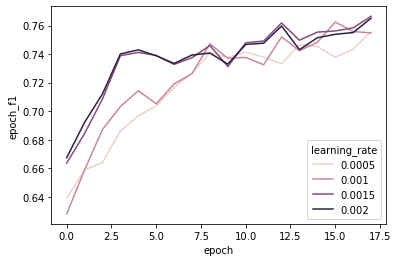

In [18]:
tmp = filter_results(data, mode = ["Test"], dataset_name = ["Fi_ATSA_eda"],HL1_size = [10], batch_size = [50])
tmp["epoch"] = [i%18 for i in range(len(tmp["epoch"]))]
tmp = tmp.groupby(["epoch","learning_rate"]).mean()
sb.lineplot(data = tmp, x = "epoch", y = "epoch_f1", hue = "learning_rate")

<AxesSubplot:xlabel='epoch', ylabel='epoch_f1'>

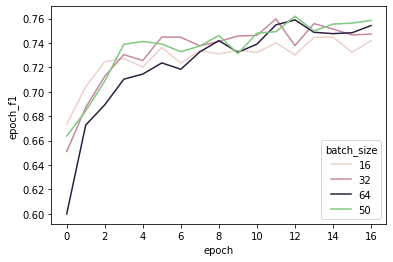

In [23]:
tmp = filter_results(data, mode = ["Test"], dataset_name = ["Fi_ATSA_eda"],HL1_size = [10], batch_size = [16,32, 64], learning_rate = [0.0015])
tmp["epoch"] = [i%17 for i in range(len(tmp["epoch"]))]


tmp = tmp.groupby(["epoch","batch_size"]).mean()
sb.lineplot(data = tmp, x = "epoch", y = "epoch_f1", hue = "batch_size")

tmp = filter_results(data, mode = ["Test"], dataset_name = ["Fi_ATSA_eda"],HL1_size = [10], batch_size = [50], learning_rate = [0.0015])
tmp["epoch"] = [i%18 for i in range(len(tmp["epoch"]))]
tmp = tmp[tmp['epoch']!=17]
tmp = tmp.groupby(["epoch","batch_size"]).mean()
sb.lineplot(data = tmp, x = "epoch", y = "epoch_f1", hue = "batch_size", palette = "Accent")